In [50]:
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import os

In [4]:
root = '.'

In [5]:
print("Loading ChEMBL preprocessed data...")
ChEMBL = pd.read_csv("../config/chembl_processed/activities_preprocessed.csv", low_memory=False)
print(f"Original size: {len(ChEMBL)}")
print("Filtering out nan values...")
ChEMBL = ChEMBL[ChEMBL['value'].isna() == False].reset_index(drop=True)
print(f"Size after filtering nan values: {len(ChEMBL)}")

Loading ChEMBL preprocessed data...
Original size: 24267312
Filtering out nan values...
Size after filtering nan values: 20911360


In [6]:
# Get mtb data
pathogen = "Mycobacterium tuberculosis"
# pathogen = "plasmodium falciparum"
ChEMBL = ChEMBL[ChEMBL['target_organism'].str.contains(pathogen, case=False, na=False) | 
                ChEMBL['assay_organism'].str.contains(pathogen, case=False, na=False)].reset_index(drop=True)

print(f"Number of activities: {len(ChEMBL)}")

df = dict(Counter(ChEMBL['target_organism']))
df = pd.DataFrame([[i, df[i]] for i in sorted(df, key = lambda x: df[x], reverse=True)], columns=['organism', 'count'])
df

Number of activities: 706206


,organism,count
0,Mycobacterium tuberculosis (strain ATCC 25618 ...,280931
1,Mycobacterium tuberculosis,215854
2,NaN,205593
3,Mycobacterium tuberculosis variant bovis,1754
4,Mycobacterium tuberculosis variant bovis BCG,1564
5,Mycobacterium tuberculosis H37Rv,378
6,Mycobacterium tuberculosis (strain CDC 1551 / ...,99
7,Mycobacterium tuberculosis variant microti,21
8,Mycobacterium bovis (strain BCG / Pasteur 1173P2),8
9,Mycobacterium bovis,2


In [10]:
pathogen = 'mtuberculosis'
ASSAYS_INFO = pd.read_csv(os.path.join(root, "..", "output", pathogen, 'assays.csv'))
ASSAYS_INFO.head()

,assay_id,assay_type,assay_organism,target_type,target_chembl_id,target_organism,activity_type,unit,activities,cpds
0,CHEMBL4649948,F,Mycobacterium tuberculosis,UNCHECKED,CHEMBL612545,NaN,PERCENTEFFECT,%,93556,86590
1,CHEMBL4649949,F,Mycobacterium tuberculosis,UNCHECKED,CHEMBL612545,NaN,PERCENTEFFECT,%,101516,86576
2,CHEMBL4649971,F,Mycobacterium tuberculosis,ORGANISM,CHEMBL360,Mycobacterium tuberculosis,PERCENTEFFECT,%,68620,68614
3,CHEMBL4649972,F,Mycobacterium tuberculosis,PROTEIN COMPLEX,CHEMBL4662931,Mycobacterium tuberculosis (strain ATCC 25618 ...,PERCENTEFFECT,%,68617,68611
4,CHEMBL4649941,F,Mycobacterium tuberculosis,SINGLE PROTEIN,CHEMBL4662928,Mycobacterium tuberculosis (strain ATCC 25618 ...,PERCENTEFFECT,%,67382,66942


In [91]:
compounds_assay = ChEMBL[(ChEMBL['assay_chembl_id'] == "CHEMBL4649948") & 
                         (ChEMBL['activity_type'] == "PERCENTEFFECT") & 
                         (ChEMBL['unit'] == "%") & 
                         (ChEMBL['canonical_smiles'].isna() == False)]['canonical_smiles'].tolist()

compounds_assay = list(set(compounds_assay))

In [92]:
import bblean
import bblean.plotting as plotting
import bblean.analysis as analysis

In [93]:
fps = bblean.fps_from_smiles(compounds_assay, pack=True, n_features=2048)
print(f"Shape: {fps.shape}, DType: {fps.dtype}")

Shape: (86589, 256), DType: uint8


In [103]:
bb_tree = bblean.BitBirch(branching_factor=50, threshold=0.6, merge_criterion="diameter")
bb_tree.fit(fps)

BitBirch(threshold=0.6, branching_factor=50, merge_criterion='diameter')

In [104]:
# First we run a cluster analysis on the resulting ids
clusters = bb_tree.get_cluster_mol_ids()
print(len(clusters))
# ca = analysis.cluster_analysis(clusters, fps, compounds_assay)

# # Afterwards we can use the utility functions on the bblean.plotting module
# plotting.summary_plot(ca, title="Diameter")

# # Optionally we can save the cluster analysis metrics as a csv file
# ca.dump_metrics("./diameter-metrics.csv")
# plt.show()

74036


In [105]:
clusters[:5]

[[6633,
  10879,
  16012,
  16800,
  17511,
  25511,
  25690,
  26220,
  30893,
  31991,
  33769,
  38081,
  39973,
  40599,
  40917,
  43893,
  44990,
  46990,
  47718,
  48648,
  52451,
  54872,
  62476,
  70427,
  70935,
  75774,
  76271,
  76956,
  77601,
  84034],
 [28281,
  30587,
  35077,
  35128,
  37320,
  37457,
  38900,
  39196,
  42168,
  42752,
  49258,
  54718,
  56020,
  60821,
  66401,
  66758,
  68503],
 [39185,
  40333,
  42613,
  43063,
  43552,
  50210,
  56751,
  57822,
  60963,
  65749,
  69841,
  70754,
  71005,
  73068,
  76383,
  82746],
 [9175,
  14012,
  14227,
  18698,
  21088,
  22643,
  25846,
  28452,
  29213,
  29613,
  32556,
  51562,
  58922,
  77670,
  82058],
 [12534,
  15278,
  16294,
  16519,
  18889,
  21511,
  23348,
  26041,
  44896,
  45135,
  47911,
  60296,
  61189,
  70743,
  72498]]

In [82]:
from rdkit import Chem

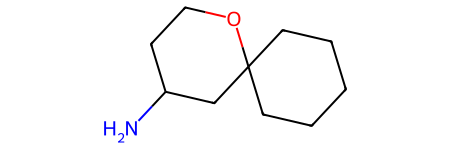

In [100]:
Chem.MolFromSmiles(compounds_assay[74387])

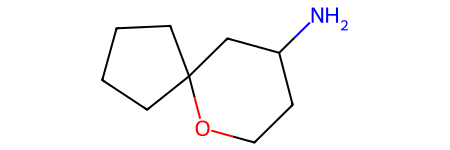

In [101]:
Chem.MolFromSmiles(compounds_assay[75548])

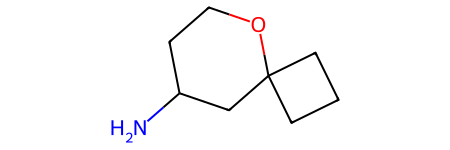

In [102]:
Chem.MolFromSmiles(compounds_assay[78459])